# Tutorial 4: PANDAS
### Dr. Daugherity, PHYS 453 - Spring 2020

Pandas gives us a beautiful way to store and analyze data.  Think of them as built-in spreadsheets with vastly powerful utilities. I highly recommend the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) as a great introduction to pandas 

**REFERENCES**
* https://jakevdp.github.io/PythonDataScienceHandbook/index.html
* https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

In [2]:
import numpy as np
import pandas as pd

In [3]:
np.__version__

'1.17.4'

In [4]:
pd.__version__

'0.25.3'

## Making Dataframes
By **faaaaaaaaaaaaaaaaaaaaar** the best and most common way is to read or download a csv file.  This is the glory of pandas!

But for this example, here's how you make one from scratch.

In [5]:
# By columns
pd.DataFrame({'col1':[1,2,3],'col2':[4,5,6]})

,col1,col2
0,1,4
1,2,5
2,3,6


In [6]:
# By columns with np arrays
x = np.linspace(0,3,4)
y = x**2
pd.DataFrame({'x':x,'y':y})

,x,y
0,0.0,0.0
1,1.0,1.0
2,2.0,4.0
3,3.0,9.0


In [7]:
# By rows
pd.DataFrame([{'col1': 1, 'col2': 2}, {'col1': 3, 'col2': 4}])

,col1,col2
0,1,2
1,3,4


---
## Viewing Dataframes

In [8]:
# By columns with np arrays
x = np.linspace(0,3,4)
y = x**2
z = x+y
names = ['Abe','Bob','Cal','Dot']
df = pd.DataFrame({'x':x,'y':y,'z':z,'Names':names})
df

,x,y,z,Names
0,0.0,0.0,0.0,Abe
1,1.0,1.0,2.0,Bob
2,2.0,4.0,6.0,Cal
3,3.0,9.0,12.0,Dot


In [9]:
df.head(2)  # show first 2 rows

,x,y,z,Names
0,0.0,0.0,0.0,Abe
1,1.0,1.0,2.0,Bob


In [10]:
df.tail(2) # show last 2 rows

,x,y,z,Names
2,2.0,4.0,6.0,Cal
3,3.0,9.0,12.0,Dot


In [11]:
df.describe()

,x,y,z
count,4.000000,4.000000,4.000000
mean,1.500000,3.500000,5.000000
std,1.290994,4.041452,5.291503
min,0.000000,0.000000,0.000000
25%,0.750000,0.750000,1.500000
50%,1.500000,2.500000,4.000000
75%,2.250000,5.250000,7.500000
max,3.000000,9.000000,12.000000


In [12]:
# View single column
df['x']  # this returns a Pandas 'Series' (which is just a 1D dataframe with index and values).  

0    0.0
1    1.0
2    2.0
3    3.0
Name: x, dtype: float64

In [13]:
df['x'].values  # returns just the values

array([0., 1., 2., 3.])

In [14]:
# View certain columns
df[['Names','z']]   # NOTE THE DOUBLE BRACKETS!

# A normal way to do this is to make a list like cols=['x','z'], then use df[cols]

,Names,z
0,Abe,0.0
1,Bob,2.0
2,Cal,6.0
3,Dot,12.0


### Searching


We can search for certain rows within the brackets

In [15]:
df[df.x>=2]  # all rows where x>=2

,x,y,z,Names
2,2.0,4.0,6.0,Cal
3,3.0,9.0,12.0,Dot


In [16]:
df[(df.x>=2) & (df.y>5)]

,x,y,z,Names
3,3.0,9.0,12.0,Dot


In [17]:
df[df.Names=='Bob']  # find Bob

,x,y,z,Names
1,1.0,1.0,2.0,Bob


In [18]:
df[df.Names=='Bob'][['Names','x']]   # only show certain columns of Bob 

,Names,x
1,Bob,1.0


**IMPORTANT NOTE:** 
IF you want to change something in the dataframe, use loc or iloc to reference it!

Syntax:  _loc[rows, cols]_  

Use loc to reference rows by index labels, use iloc to reference rows by number (often the same thing...)

In [19]:
#df[df.Names=='Bob'].x = 999  # DOES NOT WORK!
df.loc[df.Names=='Bob','x']=999   # Works! 

In [20]:
df[df.Names=='Bob'][['Names','x']]   # only show certain columns of Bob 

,Names,x
1,Bob,999.0


## Editing Columns

* Use the drop function to delete rows or columns.  
* Referring to a new column automatically creates it!

In [21]:
df['avg'] = (df.x + df.y + df.z)/3

In [22]:
df

,x,y,z,Names,avg
0,0.0,0.0,0.0,Abe,0.0
1,999.0,1.0,2.0,Bob,334.0
2,2.0,4.0,6.0,Cal,4.0
3,3.0,9.0,12.0,Dot,8.0


In [23]:
df.drop(columns=['avg'])  # drop assumes you're talking about rows unless you use columns or axis option

,x,y,z,Names
0,0.0,0.0,0.0,Abe
1,999.0,1.0,2.0,Bob
2,2.0,4.0,6.0,Cal
3,3.0,9.0,12.0,Dot


In [24]:
df.drop([1])

,x,y,z,Names,avg
0,0.0,0.0,0.0,Abe,0.0
2,2.0,4.0,6.0,Cal,4.0
3,3.0,9.0,12.0,Dot,8.0


# Plotting!

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

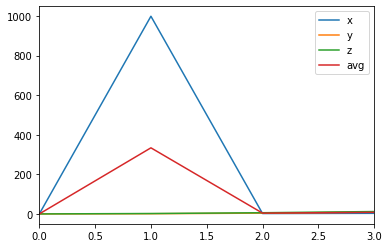

In [30]:
df.plot()

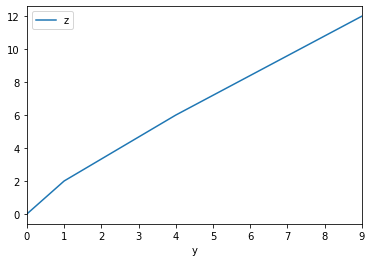

In [31]:
df.plot(x='y', y='z')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001781F2A4668>,
      dtype=object)

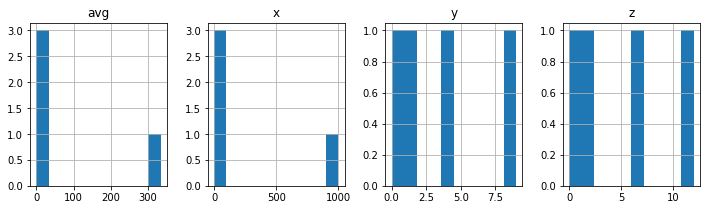

In [28]:
df.hist(figsize=(12,3),layout=(1,4))